In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Data OverView:

In [2]:
#To read xlsx file from current directory
data = pd.read_excel('online_retail_II.xlsx')
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [3]:
#code to print number of rows and columns
print(f"Dataset consists of {data.shape[0]} rows and {data.shape[1]} columns")

Dataset consists of 525461 rows and 8 columns


In [4]:
# Create Data Info
list_item = []
for col in data.columns:
    list_item.append([col, data[col].dtype, data[col].isna().sum(), 100*data[col].isna().sum()/len(data[col]), data[col].nunique(), data[col].unique()[:4]])
desc_df = pd.DataFrame(data=list_item, columns='feature data_type null_values null_pct unique_num unique_sample'.split())
desc_df

,feature,data_type,null_values,null_pct,unique_num,unique_sample
0,Invoice,object,0,0.000000,28816,"[489434, 489435, 489436, 489437]"
1,StockCode,object,0,0.000000,4632,"[85048, 79323P, 79323W, 22041]"
2,Description,object,2928,0.557225,4681,"[15CM CHRISTMAS GLASS BALL 20 LIGHTS, PINK CHE..."
3,Quantity,int64,0,0.000000,825,"[12, 48, 24, 10]"
4,InvoiceDate,datetime64[ns],0,0.000000,25296,"[2009-12-01T07:45:00.000000000, 2009-12-01T07:..."
5,Price,float64,0,0.000000,1606,"[6.95, 6.75, 2.1, 1.25]"
6,Customer ID,float64,107927,20.539488,4383,"[13085.0, 13078.0, 15362.0, 18102.0]"
7,Country,object,0,0.000000,40,"[United Kingdom, France, USA, Belgium]"


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [6]:
data.describe()

,Quantity,Price,Customer ID
count,525461.000000,525461.000000,417534.000000
mean,10.337667,4.688834,15360.645478
std,107.424110,146.126914,1680.811316
min,-9600.000000,-53594.360000,12346.000000
25%,1.000000,1.250000,13983.000000
50%,3.000000,2.100000,15311.000000
75%,10.000000,4.210000,16799.000000
max,19152.000000,25111.090000,18287.000000


Exploratory Data Analysis (EDA):

In [7]:
eda=data.copy()

In [8]:
# drop duplicates and missing values for EDA section
eda=eda.drop_duplicates()
eda = eda.dropna()
print('Missing Values : ')
eda.isna().sum()

Missing Values : 


Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [9]:
eda.shape

(410763, 8)

In [10]:
eda.describe()

,Quantity,Price,Customer ID
count,410763.000000,410763.000000,410763.000000
mean,12.923735,3.908358,15353.621857
std,102.039550,71.714794,1681.657665
min,-9360.000000,0.000000,12346.000000
25%,2.000000,1.250000,13979.000000
50%,5.000000,1.950000,15311.000000
75%,12.000000,3.750000,16797.000000
max,19152.000000,25111.090000,18287.000000


In [11]:
er=eda.select_dtypes(include='number')
er.head()

,Quantity,Price,Customer ID
0,12,6.95,13085.0
1,12,6.75,13085.0
2,12,6.75,13085.0
3,48,2.10,13085.0
4,24,1.25,13085.0


In [12]:
num = eda.select_dtypes(include='number').columns
cat = eda.select_dtypes(include='object').columns

# or by manually typing the column names

# num= ['Quantity', 'Price', 'Customer ID']
# cat= ['Invoice', 'StockCode', 'Description', 'Country']

In [13]:
#Descriptive Analysis
eda[num[0:2]].describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,410763.0,12.923735,102.039550,-9360.0,2.00,5.00,12.00,19152.00
Price,410763.0,3.908358,71.714794,0.0,1.25,1.95,3.75,25111.09


<AxesSubplot:xlabel='Price'>

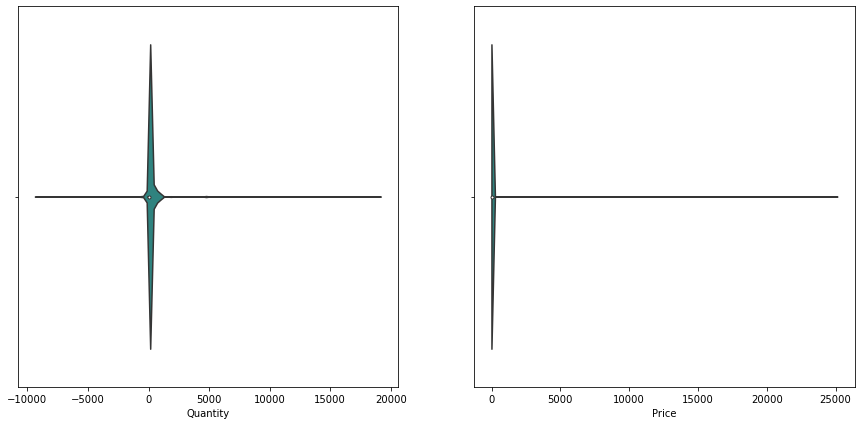

In [14]:
fig, axes = plt.subplots(1,2, figsize=(15,7))
sns.violinplot(x=eda['Quantity'], palette='viridis', ax=axes[0])
sns.violinplot(x=eda['Price'], palette='viridis', ax=axes[1])

<AxesSubplot:xlabel='Price'>

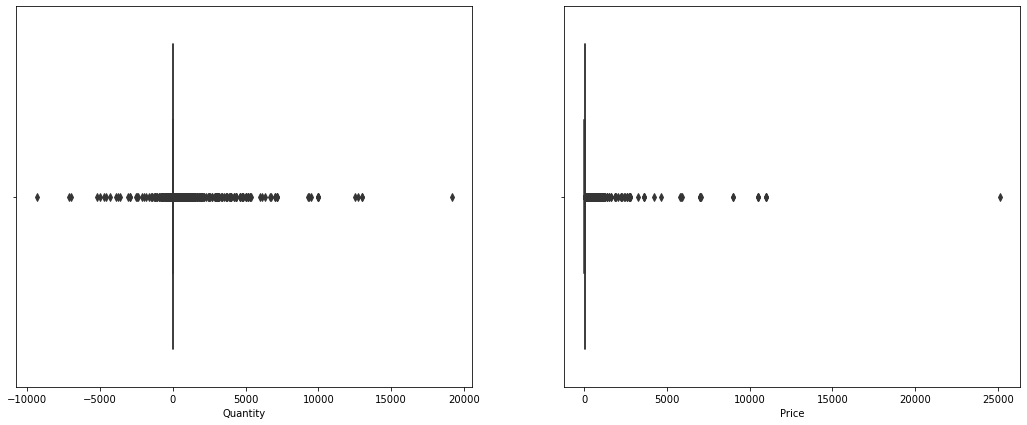

In [15]:
fig, axes = plt.subplots(1,2, figsize=(18,7))
sns.boxplot(x=eda['Quantity'], palette='viridis', ax=axes[0])
sns.boxplot(x=eda['Price'], palette='viridis', ax=axes[1])

The first thing to notice is that we have some negative values in Quantity. Maybe, this could mean that these quantities (with corresponding Price values) was returned or cancelled.
Also there are extreme values on Price, we have to handle it.

In [16]:
eda[eda['Quantity'] <0].head()  

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia


In [17]:
cancelled_orders = eda[eda['Invoice'].astype(str).str.contains('C')]
cancelled_orders

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.0,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.0,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.0,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.0,United Kingdom


In [18]:
#check how many rows our dataframe of cancelled orders contain
print("We have",len(cancelled_orders), "cancelled orders.")
#percentage of cancelled orders in total orders
total_orders = len(eda)
cancelled_number = len(cancelled_orders)
print('Percentage of orders canceled: {}/{} ({:.2f}%) '.format(cancelled_number, total_orders, cancelled_number/total_orders*100))

We have 9816 cancelled orders.
Percentage of orders canceled: 9816/410763 (2.39%) 


We have a small percentage of cancelled orders of 2.39%. Studying these cancelled orders may help in preventing future cancellation. 

Data Pre Processing

Drop Missing Values

In [19]:
data = data.dropna()
print(f'Dataset consist of {data.shape[0]} Rows and {data.shape[1]} Columns')
data = data.drop_duplicates()
print(f'Dataset consist of {data.shape[0]} Rows and {data.shape[1]} Columns')

Dataset consist of 417534 Rows and 8 Columns
Dataset consist of 410763 Rows and 8 Columns


Handling Strange Values and Outlier

In [20]:
data=data[~data['Invoice'].astype(str).str.contains('C')]
print(f'Dataset consist of {data.shape[0]} Rows and {data.shape[1]} Columns')

Dataset consist of 400947 Rows and 8 Columns


In [21]:
print(data[data['Quantity']<0].shape)
print(data[data['Quantity']>0].shape)

(0, 8)
(400947, 8)


In [22]:
data[(data['Quantity'] > 8000)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
65091,495194,20993,JAZZ HEARTS MEMO PAD,9312,2010-01-21 15:11:00,0.10,13902.0,Denmark
90857,497946,37410,BLACK AND WHITE PAISLEY FLOWER MUG,19152,2010-02-15 11:57:00,0.10,13902.0,Denmark
93677,498152,85220,SMALL FAIRY CAKE FRIDGE MAGNETS,9456,2010-02-17 10:51:00,0.30,13902.0,Denmark
127166,501534,21099,SET/6 STRAWBERRY PAPER CUPS,12960,2010-03-17 13:09:00,0.10,13902.0,Denmark
127167,501534,21092,SET/6 STRAWBERRY PAPER PLATES,12480,2010-03-17 13:09:00,0.10,13902.0,Denmark
127168,501534,21091,SET/6 WOODLAND PAPER PLATES,12960,2010-03-17 13:09:00,0.10,13902.0,Denmark
127169,501534,21085,SET/6 WOODLAND PAPER CUPS,12744,2010-03-17 13:09:00,0.10,13902.0,Denmark
135027,502269,21984,PACK OF 12 PINK PAISLEY TISSUES,10000,2010-03-23 15:36:00,0.25,17940.0,United Kingdom
135028,502269,21982,PACK OF 12 SUKI TISSUES,10000,2010-03-23 15:36:00,0.25,17940.0,United Kingdom
135029,502269,21980,PACK OF 12 RED SPOTTY TISSUES,10000,2010-03-23 15:36:00,0.25,17940.0,United Kingdom


In [23]:
# filter data['Quantity'] < 10000
data = data[data['Quantity'] < 8000]
print(f'Dataset consist of {data.shape[0]} Rows and {data.shape[1]} Columns')

Dataset consist of 400935 Rows and 8 Columns


In [24]:
# Price feature
data['Price'].describe()

count    400935.000000
mean          3.305661
std          35.046897
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max       10953.500000
Name: Price, dtype: float64

In [25]:
data[data['Price']> 8000]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
74356,496115,M,Manual,1,2010-01-29 11:04:00,8985.6,17949.0,United Kingdom
135013,502263,M,Manual,1,2010-03-23 15:22:00,10953.5,12918.0,United Kingdom
358639,524159,M,Manual,1,2010-09-27 16:12:00,10468.8,14063.0,United Kingdom


In [26]:
data[data["Customer ID"]==14063.0].shape[0]

40

Feature Engineering

In [27]:
# change data type
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Check min and max
print('Max Date : ', data['InvoiceDate'].max())
print('Min Date : ', data['InvoiceDate'].min())
print('Time Period : ', data['InvoiceDate'].max()-data['InvoiceDate'].min())

Max Date :  2010-12-09 20:01:00
Min Date :  2009-12-01 07:45:00
Time Period :  373 days 12:16:00


In [28]:
df = data.copy()

In [29]:
# create new features
df['Dayofmonth'] = df['InvoiceDate'].dt.day
df['Day_name'] = df['InvoiceDate'].dt.day_name()
df['Month'] = df['InvoiceDate'].dt.month
df['Year'] = df['InvoiceDate'].dt.year
df['Hour'] = df['InvoiceDate'].dt.hour

In [30]:
# create sales feature
df['Sales'] = df['Price']*df['Quantity']

In [31]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Dayofmonth,Day_name,Month,Year,Hour,Sales
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,1,Tuesday,12,2009,7,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,1,Tuesday,12,2009,7,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,1,Tuesday,12,2009,7,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,1,Tuesday,12,2009,7,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,1,Tuesday,12,2009,7,30.0


Business Insights

Top 10 Countries by Num of Customers

In [32]:
df.groupby(['Country'])['Customer ID'].nunique().sort_values(ascending=False).head(10)

Country
United Kingdom    3971
Germany             67
France              47
Spain               25
Netherlands         22
Portugal            18
Belgium             17
Sweden              16
Australia           15
Switzerland         14
Name: Customer ID, dtype: int64

<AxesSubplot:xlabel='Country'>

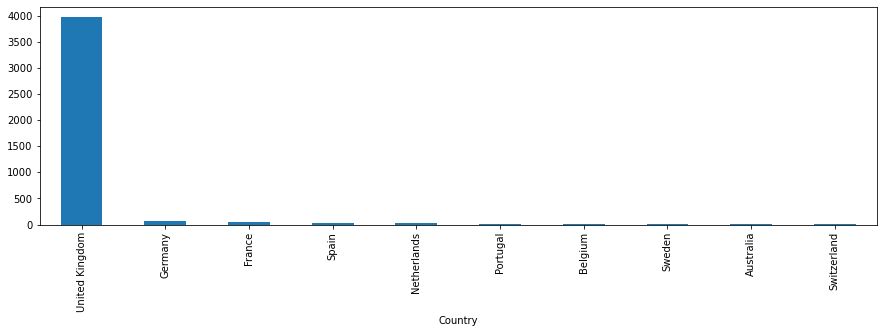

In [33]:
#plot bar chart
plt.figure(figsize=(10, 6))
df.groupby(['Country'])['Customer ID'].nunique().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(15,4))

Top 10 Countries by Sales

In [34]:
df.groupby(['Country']).agg(Sales=('Sales','sum')).sort_values(by="Sales",ascending=False).reset_index().head(10)

,Country,Sales
0,United Kingdom,7355826.033
1,EIRE,356041.860
2,Netherlands,268784.350
3,Germany,202025.391
4,France,146107.070
5,Sweden,53147.990
6,Spain,47568.650
7,Switzerland,43921.390
8,Denmark,40109.250
9,Australia,31446.800


Top 10 Best Seller Product

Text(0.5, 1.0, 'Top 10 Best Seller Products')

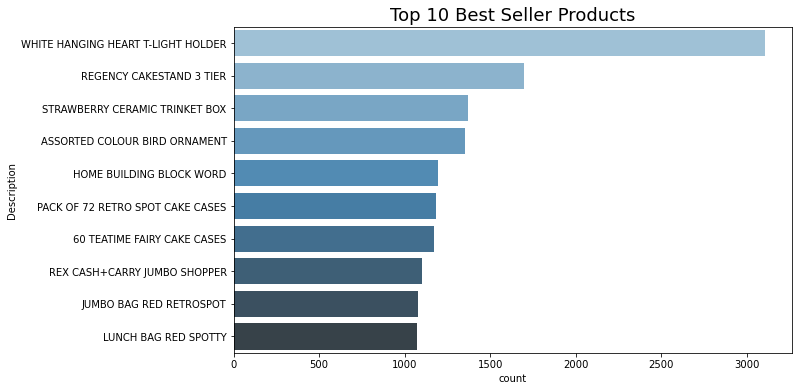

In [37]:
plt.figure(figsize=(10, 6))
sns.countplot(y=df['Description'], palette='Blues_d', order=df['Description'].value_counts().iloc[:10].index)
plt.title('Top 10 Best Seller Products', fontsize=18)

Top 10 Highest Quantity Product Sold

In [38]:
df.groupby(["Description"])["Quantity"].sum().sort_values(ascending=False).reset_index().head(10)

,Description,Quantity
0,WHITE HANGING HEART T-LIGHT HOLDER,56814
1,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54610
2,BROCADE RING PURSE,48166
3,PACK OF 72 RETRO SPOT CAKE CASES,45129
4,ASSORTED COLOUR BIRD ORNAMENT,44431
5,60 TEATIME FAIRY CAKE CASES,35656
6,PACK OF 60 PINK PAISLEY CAKE CASES,30871
7,JUMBO BAG RED RETROSPOT,29519
8,SMALL POPCORN HOLDER,25703
9,STRAWBERRY CERAMIC TRINKET BOX,25330


Text(0.5, 1.0, 'Top 10 Highest Quantity Sold')

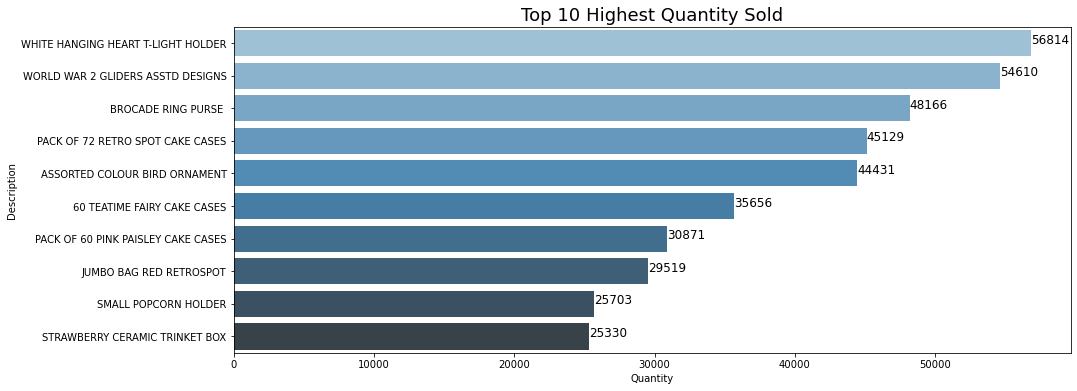

In [39]:
plt.figure(figsize=(15, 6))
sns.barplot(y='Description', x='Quantity', palette='Blues_d', 
            data=df.groupby(["Description"])["Quantity"].sum().sort_values(ascending=False).reset_index().head(10))

for i, v in enumerate(df.groupby(["Description"])["Quantity"].sum().sort_values(ascending=False).reset_index().head(10)['Quantity']):
    plt.text(v,i,v,color='k',fontsize=12)
plt.title('Top 10 Highest Quantity Sold', fontsize=18)

# plt.text(x, y, text, **kwargs)
# x and y specify the coordinates where the text will be placed.
# text is the actual text or string that will be displayed.
# **kwargs are optional keyword arguments that can be used to control the 
# appearance of the text, such as font size, color, style, and alignment

Top 10 Highest Sales Products

In [40]:
df.groupby(["Description"])["Sales"].sum().sort_values(ascending=False).reset_index().head(10)

,Description,Sales
0,WHITE HANGING HEART T-LIGHT HOLDER,151339.16
1,REGENCY CAKESTAND 3 TIER,143727.60
2,Manual,98531.99
3,ASSORTED COLOUR BIRD ORNAMENT,70291.03
4,JUMBO BAG RED RETROSPOT,51644.25
5,POSTAGE,48741.08
6,PAPER CHAIN KIT 50'S CHRISTMAS,36871.55
7,PARTY BUNTING,35017.30
8,EDWARDIAN PARASOL NATURAL,34044.75
9,JUMBO BAG STRAWBERRY,33926.25


Text(0.5, 1.0, 'Top 10 products having Highest Sales')

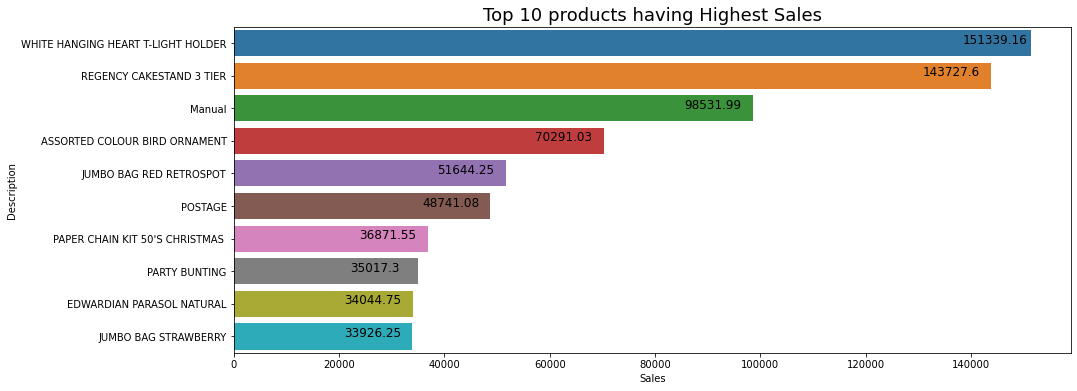

In [41]:
plt.figure(figsize=(15, 6))
sns.barplot(y="Description", x="Sales",
            data=df.groupby(["Description"])["Sales"].sum().sort_values(ascending=False).reset_index().head(10))
for i,v in enumerate(df.groupby(["Description"])["Sales"].sum().sort_values(ascending=False).reset_index().head(10)['Sales']):
    plt.text(v-13000,i,v,color='k',fontsize=12)
plt.title('Top 10 products having Highest Sales', fontsize=18)

In [42]:
print("Time period of our data starts from {} and ends at {}.".format(df['InvoiceDate'].min(), df['InvoiceDate'].max()))

Time period of our data starts from 2009-12-01 07:45:00 and ends at 2010-12-09 20:01:00.


In [43]:
#Monthly Sales
df.groupby(['Year','Month'])['Sales'].sum().reset_index()

,Year,Month,Sales
0,2009,12,683504.010
1,2010,1,554871.472
2,2010,2,499806.956
3,2010,3,681864.071
4,2010,4,591982.002
5,2010,5,597833.380
6,2010,6,636371.130
7,2010,7,589736.170
8,2010,8,602224.600
9,2010,9,829013.951


In [44]:
df2010=df[df['Year']==2010]

Number of Transaction by Month

Text(0.5, 1.0, 'Monthly Transactions Counts')

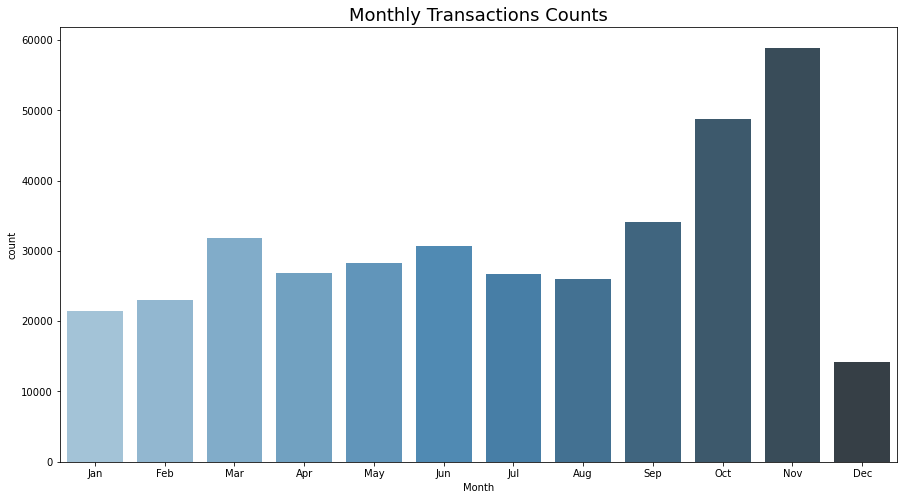

In [45]:
plt.figure(figsize=(15,8))
sns.countplot(x='Month', data=df2010, palette='Blues_d')
#To change xticks with month name
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11], 
            labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title('Monthly Transactions Counts', fontsize=18)

November is the month with the highest transactions

Monthly Revenue

In [46]:
df2010.groupby(['Month'])['Sales'].sum().reset_index()

,Month,Sales
0,1,554871.472
1,2,499806.956
2,3,681864.071
3,4,591982.002
4,5,597833.380
5,6,636371.130
6,7,589736.170
7,8,602224.600
8,9,829013.951
9,10,1033112.010


Text(0.5, 1.0, 'Monthly Sales')

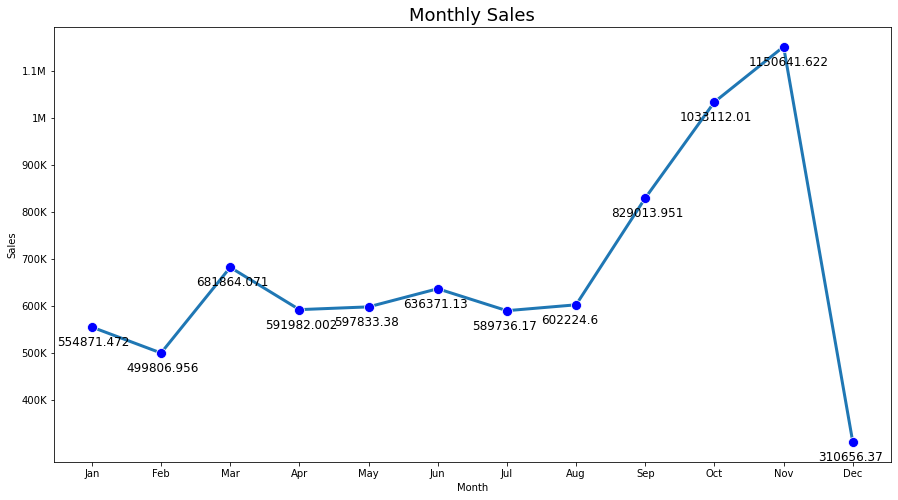

In [47]:
plt.figure(figsize=(15,8))
sns.lineplot(x='Month', y='Sales', data=df2010.groupby(['Month'])['Sales'].sum().reset_index()
            , palette='Blues_d',marker='o', linewidth=3, markersize=10,markerfacecolor='b')
plt.xticks(ticks=[1,2,3,4,5,6,7,8,9,10,11,12],
              labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
#dislay y lable yticks
plt.yticks(ticks=[400000,500000,600000,700000,800000,900000,1000000,1100000],
                labels=['400K','500K','600K','700K','800K','900K','1M','1.1M'])
#dislay value text
for i,v in enumerate(df2010.groupby(['Month'])['Sales'].sum().reset_index()['Sales']):
    plt.text(i+0.5,v-40000,v,color='k',fontsize=12)
plt.title('Monthly Sales', fontsize=18)

Monthly Repeated Customers

In [48]:
# we're taking all of the transactions that occurred before December 01, 2010 
df_new = df.loc[df['InvoiceDate'] < '2010-12-01']

In [49]:
custID_groupby_df=df_new.groupby("Customer ID").agg({"Invoice":len, 
                                "Quantity":sum, 
                                "Sales":sum}).sort_values(by="Sales",ascending=False)
custID_groupby_df.columns=['total_transaction','total_unit','total_sales']
custID_groupby_df.head(10)

,total_transaction,total_unit,total_sales
Customer ID,,,
18102.0,609,117521,321329.74
14646.0,1774,170342,248396.50
14156.0,2643,106557,196227.54
14911.0,5407,67732,147709.64
13694.0,951,124889,130601.07
17511.0,905,52625,81070.49
16684.0,441,54555,80489.21
15061.0,495,45360,71854.88
16754.0,138,59271,63497.67


In [50]:
#To check if same invoice number can have same invoice date
df_new.groupby(['Invoice']).agg({'InvoiceDate':lambda x: x.nunique()}).sort_values(by='InvoiceDate'
                                ,ascending=False).head(10)

,InvoiceDate
Invoice,
519718,2
531756,2
521901,2
492807,2
530665,2
499967,2
503609,2
528588,2
521922,2


In [51]:
#Check for any of the above invoice number to understand why it has more than one invoice date
df_new[df_new['Invoice']==492807].loc[:,['Invoice','StockCode','Description','Customer ID','InvoiceDate']]

,Invoice,StockCode,Description,Customer ID,InvoiceDate
41630,492807,85131A,BEADED PEARL HEART WHITE ON STICK,17211.0,2009-12-20 12:28:00
41631,492807,85129A,"WHITE PEARL BEADED HEART, SMALL",17211.0,2009-12-20 12:28:00
41632,492807,85129D,BEADED CRYSTAL HEART PINK SMALL,17211.0,2009-12-20 12:28:00
41633,492807,85129B,BEADED CRYSTAL HEART GREEN SMALL,17211.0,2009-12-20 12:28:00
41634,492807,85129A,"WHITE PEARL BEADED HEART, SMALL",17211.0,2009-12-20 12:28:00
41635,492807,21645,ASSORTED TUTTI FRUTTI ROUND BOX,17211.0,2009-12-20 12:28:00
41636,492807,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,17211.0,2009-12-20 12:28:00
41637,492807,21813,GARLAND WITH STARS AND BELLS,17211.0,2009-12-20 12:28:00
41638,492807,22139,RETRO SPOT TEA SET CERAMIC 11 PC,17211.0,2009-12-20 12:28:00
41639,492807,37340,MULTICOLOUR SPRING FLOWER MUG,17211.0,2009-12-20 12:28:00


Here we can see that for a particular invoice, the customer may have ordered multiple different items , which means that he/she bought several different items in one transaction, also thing to be noted is whereever number of unique Invoice date for same invoice is 2 it is due to 1 minute difference in the time. but it does not mean that it is a different transaction.

In [52]:
# Get total amount spent(Sales) per invoice and associate it with CustomerID and Country
invoice_groupby_df = df_new.groupby(['Invoice']).agg({'InvoiceDate': min,
                                                        'Sales': sum, 
                                                        'Customer ID': min,
                                                        'Country': max,}).reset_index()

# Sort on Amount spent, this gives us the largest invoices
#invoice_groupby_df = invoice_groupby_df.sort_values(by='Sales', ascending=False) 
invoice_groupby_df


,Invoice,InvoiceDate,Sales,Customer ID,Country
0,489434,2009-12-01 07:45:00,505.30,13085.0,United Kingdom
1,489435,2009-12-01 07:46:00,145.80,13085.0,United Kingdom
2,489436,2009-12-01 09:06:00,630.33,13078.0,United Kingdom
3,489437,2009-12-01 09:08:00,310.75,15362.0,United Kingdom
4,489438,2009-12-01 09:24:00,2286.24,18102.0,United Kingdom
...,...,...,...,...,...
18432,536359,2010-11-30 18:05:00,70.80,17281.0,United Kingdom
18433,536360,2010-11-30 18:21:00,297.55,13693.0,United Kingdom
18434,536361,2010-11-30 18:46:00,10.95,17378.0,United Kingdom
18435,536363,2010-11-30 19:27:00,1582.07,13093.0,United Kingdom


In [53]:
# We set Invoicedate as index to our invoice_groupby_df
monthly_repeat_customers = invoice_groupby_df.set_index('InvoiceDate')
monthly_repeat_customers

,Invoice,Sales,Customer ID,Country
InvoiceDate,,,,
2009-12-01 07:45:00,489434,505.30,13085.0,United Kingdom
2009-12-01 07:46:00,489435,145.80,13085.0,United Kingdom
2009-12-01 09:06:00,489436,630.33,13078.0,United Kingdom
2009-12-01 09:08:00,489437,310.75,15362.0,United Kingdom
2009-12-01 09:24:00,489438,2286.24,18102.0,United Kingdom
...,...,...,...,...
2010-11-30 18:05:00,536359,70.80,17281.0,United Kingdom
2010-11-30 18:21:00,536360,297.55,13693.0,United Kingdom
2010-11-30 18:46:00,536361,10.95,17378.0,United Kingdom


In [54]:
monthly_repeat_customers = monthly_repeat_customers.groupby([pd.Grouper(freq='M'), 
                                                            'Customer ID']).filter(lambda x: len(x) > 1)
monthly_repeat_customers

,Invoice,Sales,Customer ID,Country
InvoiceDate,,,,
2009-12-01 07:45:00,489434,505.30,13085.0,United Kingdom
2009-12-01 07:46:00,489435,145.80,13085.0,United Kingdom
2009-12-01 09:06:00,489436,630.33,13078.0,United Kingdom
2009-12-01 09:24:00,489438,2286.24,18102.0,United Kingdom
2009-12-01 09:28:00,489439,426.30,12682.0,France
...,...,...,...,...
2010-11-30 17:43:00,536353,1115.32,17160.0,United Kingdom
2010-11-30 17:56:00,536357,162.00,17204.0,United Kingdom
2010-11-30 17:58:00,536358,960.14,17204.0,United Kingdom


In [55]:
monthly_repeat_customers = monthly_repeat_customers.resample('M').nunique()['Customer ID'].reset_index()
monthly_repeat_customers

,InvoiceDate,Customer ID
0,2009-12-31,286
1,2010-01-31,148
2,2010-02-28,174
3,2010-03-31,236
4,2010-04-30,202
5,2010-05-31,228
6,2010-06-30,257
7,2010-07-31,255
8,2010-08-31,219
9,2010-09-30,270


Text(0.5, 0, 'Num of Repeat Customers')

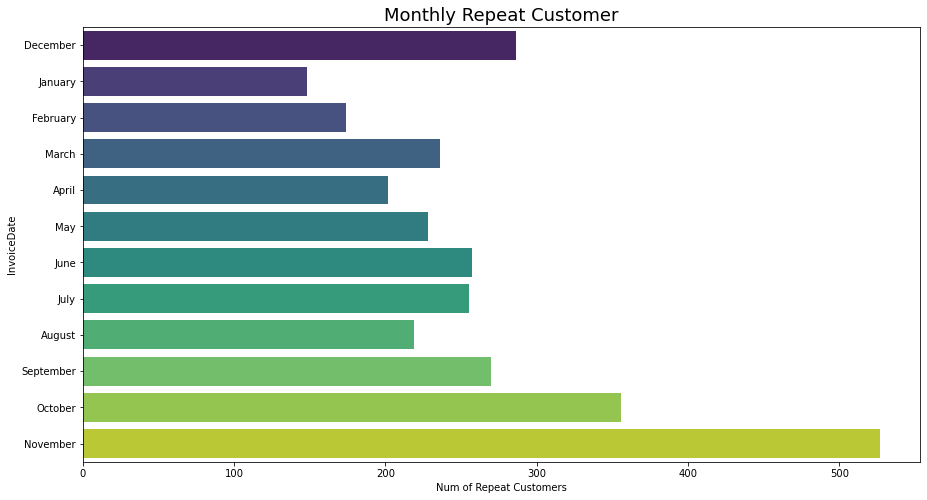

In [56]:
plt.figure(figsize=(15,8))
month_order = ['2009-12-31', '2010-01-31', '2010-02-28', '2010-03-31', '2010-04-30', '2010-05-31',
               '2010-06-30','2010-07-31', '2010-08-31', '2010-09-30', '2010-10-31', '2010-11-30']
ytics = ['December','January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November']


a = sns.barplot(y='InvoiceDate', x='Customer ID', data=monthly_repeat_customers, palette='viridis')
a.set_yticklabels(ytics)
plt.title('Monthly Repeat Customer', fontsize=18)
plt.xlabel('Num of Repeat Customers')

Monthly Unique Customers

In [57]:
# now lets compare monthly_repeat_customers againts the total number of monthly customers 
monthly_unique_customerss = df_new.set_index('InvoiceDate')['Customer ID'].resample('M').nunique().reset_index()
monthly_unique_customerss

,InvoiceDate,Customer ID
0,2009-12-31,955
1,2010-01-31,720
2,2010-02-28,774
3,2010-03-31,1057
4,2010-04-30,942
5,2010-05-31,966
6,2010-06-30,1041
7,2010-07-31,928
8,2010-08-31,911
9,2010-09-30,1145


Text(0.5, 0, 'Num of Unique Customers')

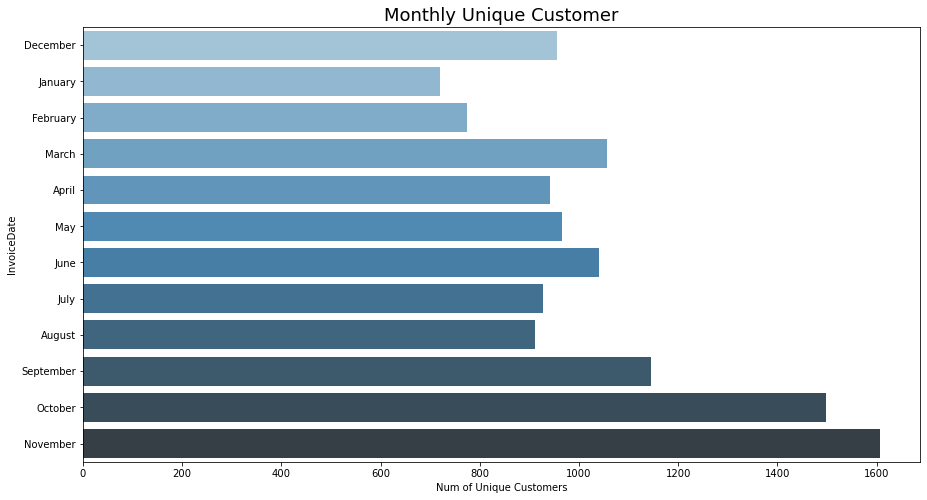

In [58]:
plt.figure(figsize=(15,8))
month_order = ['2009-12-31', '2010-01-31', '2010-02-28', '2010-03-31', '2010-04-30', '2010-05-31',
               '2010-06-30','2010-07-31', '2010-08-31', '2010-09-30', '2010-10-31', '2010-11-30']
ytics = ['December','January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November']


a = sns.barplot(y='InvoiceDate', x='Customer ID', data=monthly_unique_customerss, palette='Blues_d')
a.set_yticklabels(ytics)
plt.title('Monthly Unique Customer', fontsize=18)
plt.xlabel('Num of Unique Customers')

In [59]:
monthly_once_customers=invoice_groupby_df.set_index('InvoiceDate').groupby(
    [pd.Grouper(freq='M'), 'Customer ID']).filter(lambda x: len(x) == 1).resample('M').nunique()['Customer ID'].reset_index()
monthly_once_customers

,InvoiceDate,Customer ID
0,2009-12-31,669
1,2010-01-31,572
2,2010-02-28,600
3,2010-03-31,821
4,2010-04-30,740
5,2010-05-31,738
6,2010-06-30,784
7,2010-07-31,673
8,2010-08-31,692
9,2010-09-30,875


In [60]:
# repeat customer
monthly_repeat_customer = invoice_groupby_df.set_index('InvoiceDate').groupby([
  pd.Grouper(freq='M'), 'Customer ID']).filter(lambda x: len(x) > 1).resample('M').nunique()['Customer ID']

# unique customer
monthly_unique_customer = df_new.set_index('InvoiceDate')['Customer ID'].resample('M').nunique()

monthly_repeat_percentages = (monthly_repeat_customer/monthly_unique_customer*100)

# Ratio of Repeat to Unique customers
monthly_repeat_percentage = (monthly_repeat_customer/monthly_unique_customer*100).reset_index()
monthly_repeat_percentage.columns=['InvoiceDate','Repeat_customers_percentage']
monthly_repeat_percentage

,InvoiceDate,Repeat_customers_percentage
0,2009-12-31,29.947644
1,2010-01-31,20.555556
2,2010-02-28,22.480620
3,2010-03-31,22.327342
4,2010-04-30,21.443737
5,2010-05-31,23.602484
6,2010-06-30,24.687800
7,2010-07-31,27.478448
8,2010-08-31,24.039517
9,2010-09-30,23.580786


Text(0.5, 0, 'Percentage Repeat Customers (%)')

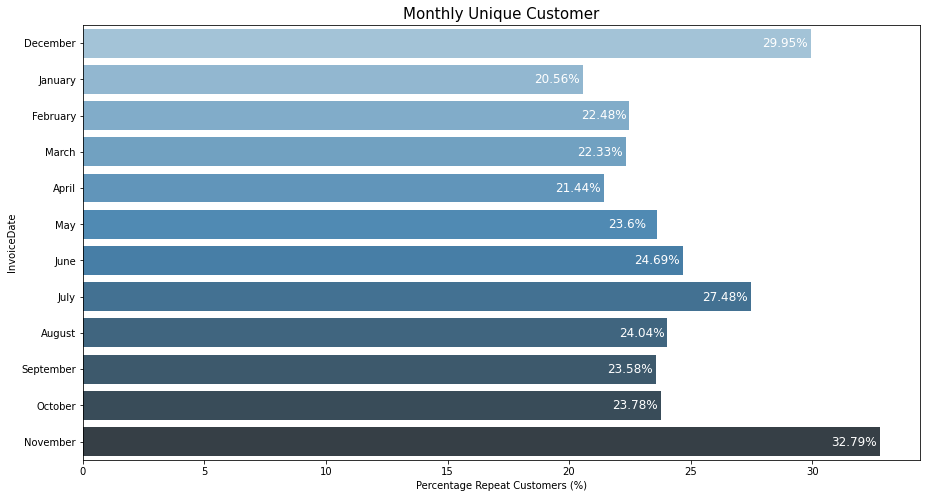

In [61]:
plt.figure(figsize=(15,8))  
ytics = ['December','January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November']
xtics = ['0%', '5%', '10%', '15%', '20%', '25%', '30%']
c = sns.barplot(y='InvoiceDate', x='Repeat_customers_percentage', data=monthly_repeat_percentage, palette='Blues_d')
c.set_yticklabels(ytics)
#how to add values on top of bar
for i,v in enumerate(monthly_repeat_percentage['Repeat_customers_percentage']):
    c.text(v-2,i+0.1,str(round(v,2))+'%',color='w',fontsize=12)

plt.title('Monthly Unique Customer', fontsize=15)
plt.xlabel('Percentage Repeat Customers (%)')

Number of Unique Customers vs. Repeat Customers Over Time

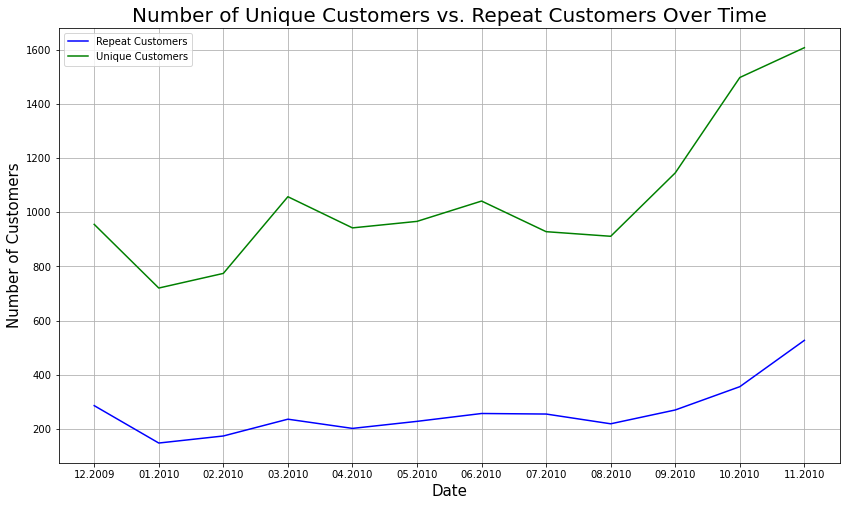

In [62]:
# plot repeat customers
ax = pd.DataFrame(monthly_repeat_customer.values).plot(figsize=(14,8), color='Blue')

# plot unique custoemrs
pd.DataFrame(monthly_unique_customer.values).plot(ax=ax,grid=True, color='Green')

ax.set_xlabel('Date', fontsize=15)
ax.set_ylabel('Number of Customers', fontsize=15)
ax.set_title('Number of Unique Customers vs. Repeat Customers Over Time', fontsize=20)
plt.legend(['Repeat Customers', 'Unique Customers'])
plt.xticks(range(len(monthly_repeat_customer.index)), [x.strftime('%m.%Y') for x in monthly_repeat_customer.index])

plt.show()

Monthly Revenue vs Monthly Revenue Repeat Customers

In [63]:
# Let's investigate the relationship between revenue and repeat customers
monthly_revenue = df_new.set_index('InvoiceDate')['Sales'].resample('M').sum()

# monthly revenue repeat customer
monthly_rev_repeat_cust = invoice_groupby_df.set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'), 'Customer ID']).filter(lambda x: len(x) > 1).resample('M').sum()['Sales']

# Let's get a percentage of the revenue from repeat customers to the overall monthly revenue
monthly_rev_perc_repeat_cust = monthly_rev_repeat_cust/monthly_revenue * 100.0

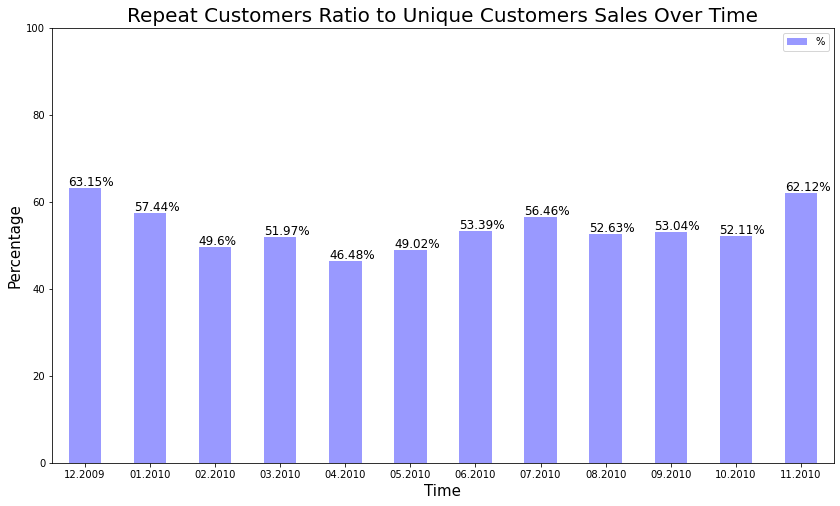

In [64]:
ax = pd.DataFrame(monthly_rev_perc_repeat_cust.values).plot.bar(figsize=(14,8), color='Blue', alpha=0.4)

for i,v in enumerate(monthly_rev_perc_repeat_cust):
    ax.text(i-0.25,v+0.5,str(round(v,2))+'%',color='black',fontsize=12)

ax.set_ylim([0, 100])
ax.set_xlabel('Time', fontsize=15)
ax.set_ylabel('Percentage', fontsize=15)
ax.set_title('Repeat Customers Ratio to Unique Customers Sales Over Time', fontsize=20)
plt.legend('%')
plt.xticks(range(len(monthly_rev_repeat_cust.index)), [x.strftime('%m.%Y') for x in monthly_rev_repeat_cust.index], rotation=0)

plt.show()

Customer Lifetime Values

In [65]:
cltv_df= df.groupby("Customer ID").agg({"Invoice":lambda x: len(x),
                                        "Quantity":lambda x: x.sum(),
                                        "Sales":lambda x:x.sum()})
cltv_df.columns=['total_transactions','total_units','total_sales']
cltv_df.head()

,total_transactions,total_units,total_sales
Customer ID,,,
12346.0,33,70,372.86
12347.0,71,828,1323.32
12348.0,20,373,222.16
12349.0,102,993,2671.14
12351.0,21,261,300.93


1. Calculate Average Order Value (AOV)

In [66]:
# CLTV = (Customer_Value / Churn_Rate) x Profit_margin.
# Customer_Value = Average_Order_Value * Purchase_Frequency
# Average_Order_Value = Total_Revenue / Total_Number_of_Orders ( Earnings Per Unit )
# Purchase_Frequency =  Total_Number_of_Orders / Total_Number_of_Customers
# Churn_Rate = 1 - Repeat_Rate
# Profit_margin=  (Total_Revenue - cost_of_all_goods_sold)/Total_Revenue

In [67]:
cltv_df["avg_order_value"]=cltv_df["total_sales"]*cltv_df["total_transactions"] # greater is the better value
cltv_df["avg_order_value"].head()

Customer ID
12346.0     12304.38
12347.0     93955.72
12348.0      4443.20
12349.0    272456.28
12351.0      6319.53
Name: avg_order_value, dtype: float64

2. Calculate Purchase Frequency (F)

In [68]:
cltv_df.shape[0]

4314

In [69]:
cltv_df["purchase_frequency"]=cltv_df["total_transactions"]/cltv_df.shape[0]
cltv_df["purchase_frequency"].head(10)

Customer ID
12346.0    0.007650
12347.0    0.016458
12348.0    0.004636
12349.0    0.023644
12351.0    0.004868
12352.0    0.004172
12353.0    0.004636
12355.0    0.005100
12356.0    0.019240
12357.0    0.038248
Name: purchase_frequency, dtype: float64

3. Calculate Retention Rate (RR) and Churn Rate (CR)

In [70]:
# retention rate is the the number of customers who shopped at least 2 times in the dataset divided by the total number of customers
retention_rate=cltv_df[cltv_df.total_transactions>1].shape[0]/cltv_df.shape[0]
retention_rate

0.978442280945758

In [71]:
#so the repeat_rate is 0.978442280945758
churn_rate = round(1 - retention_rate,5)
churn_rate

0.02156

4. Calculate Profit Margin (PM)

In [72]:
# We assume 5% profit from the total sales and since it is unique for each customer, 
# we add this profit margin to this dataset.
cltv_df["profit_margin"]=cltv_df["total_sales"]*0.05
cltv_df["profit_margin"].head()

Customer ID
12346.0     18.6430
12347.0     66.1660
12348.0     11.1080
12349.0    133.5570
12351.0     15.0465
Name: profit_margin, dtype: float64

5. Customer Value (CV)

6. Customer Lifetime Value (CLTV)

In [73]:
# CLTV = (Customer_Value / Churn_Rate) x Profit_margin.
# Customer_Value = Average_Order_Value * Purchase_Frequency
cltv_df['CV']=(cltv_df['avg_order_value']/cltv_df['purchase_frequency'])/churn_rate
cltv_df['CLTV']=cltv_df['CV']*cltv_df["profit_margin"]


pd.set_option('display.float_format', lambda x: '%.3f' % x)
cltv_df.sort_values("CLTV",ascending=False).head()

,total_transactions,total_units,total_sales,avg_order_value,purchase_frequency,profit_margin,CV,CLTV
Customer ID,,,,,,,,
18102.000,627,124216,349164.350,218926047.450,0.145,17458.218,69865260013.915,1219722905016975.250
14646.000,1774,170342,248396.500,440655391.000,0.411,12419.825,49702342346.939,617294394039068.875
14156.000,2646,108105,196549.740,520070612.040,0.613,9827.487,39328180814.471,386497185687865.438
14911.000,5568,69709,152121.220,847010952.960,1.291,7606.061,30438355430.427,231515988143506.906
13694.000,957,125893,131443.190,125791132.830,0.222,6572.160,26300831245.826,172853257930149.594


In [75]:
# to make more understandable and readable lets transform it
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(1,100))
scaler.fit(cltv_df[["CLTV"]])
cltv_df["SCALED_CLTV"]=scaler.transform(cltv_df[["CLTV"]])
cltv_df.sort_values("CLTV",ascending=False)
pd.set_option('display.max_columns',20)
cltv_df[["total_transactions","total_units","total_sales",
            "CLTV","SCALED_CLTV"]].sort_values(by="CLTV",ascending=False).head()

,total_transactions,total_units,total_sales,CLTV,SCALED_CLTV
Customer ID,,,,,
18102.000,627,124216,349164.350,1219722905016975.250,100.000
14646.000,1774,170342,248396.500,617294394039068.875,51.103
14156.000,2646,108105,196549.740,386497185687865.438,32.370
14911.000,5568,69709,152121.220,231515988143506.906,19.791
13694.000,957,125893,131443.190,172853257930149.594,15.030


In [77]:
cltv_df.sort_values("total_sales",ascending=False)

,total_transactions,total_units,total_sales,avg_order_value,purchase_frequency,profit_margin,CV,CLTV,SCALED_CLTV
Customer ID,,,,,,,,,
18102.000,627,124216,349164.350,218926047.450,0.145,17458.218,69865260013.915,1219722905016975.250,100.000
14646.000,1774,170342,248396.500,440655391.000,0.411,12419.825,49702342346.939,617294394039068.875,51.103
14156.000,2646,108105,196549.740,520070612.040,0.613,9827.487,39328180814.471,386497185687865.438,32.370
14911.000,5568,69709,152121.220,847010952.960,1.291,7606.061,30438355430.427,231515988143506.906,19.791
13694.000,957,125893,131443.190,125791132.830,0.222,6572.160,26300831245.826,172853257930149.594,15.030
...,...,...,...,...,...,...,...,...,...
15913.000,1,3,6.300,6.300,0.000,0.315,1260584.416,397084.091,1.000
13788.000,1,1,3.750,3.750,0.000,0.188,750347.866,140690.225,1.000
14095.000,1,1,2.950,2.950,0.000,0.148,590273.655,87065.364,1.000


In [ ]:
#how does qcut work?

In [79]:
cltv_df["segment"]=pd.qcut(cltv_df["SCALED_CLTV"],4,labels=['D','C','B','A'])
cltv_df[["segment", "total_transactions", "total_units", "total_sales", "CLTV", "SCALED_CLTV"]].sort_values(
    by="SCALED_CLTV",
    ascending=False).head()

,segment,total_transactions,total_units,total_sales,CLTV,SCALED_CLTV
Customer ID,,,,,,
18102.000,A,627,124216,349164.350,1219722905016975.250,100.000
14646.000,A,1774,170342,248396.500,617294394039068.875,51.103
14156.000,A,2646,108105,196549.740,386497185687865.438,32.370
14911.000,A,5568,69709,152121.220,231515988143506.906,19.791
13694.000,A,957,125893,131443.190,172853257930149.594,15.030


In [80]:
cltv_df.groupby('segment')[["total_transactions", "total_units", "total_sales", "CLTV", "SCALED_CLTV"]].agg(
    {"count","mean","sum"})

total_transactions               total_units                 \
                       sum count    mean         sum count     mean   
segment                                                               
D                    18182  1079  16.851      116463  1079  107.936   
C                    41196  1078  38.215      303755  1078  281.776   
B                    86000  1078  79.777      728608  1078  675.889   
A                   255557  1079 236.846     4233198  1079 3923.260   

        total_sales                                CLTV        \
                sum count     mean                  sum count   
segment                                                         
D        190523.810  1079  176.574     397743910925.178  1079   
C        508754.173  1078  471.943    2542076857326.246  1078   
B       1211911.370  1078 1124.222   14539031116402.406  1078   
A       6850428.391  1079 6348.868 3566701255407398.500  1079   

                          SCALED_CLTV              
                     mean         sum count  mean  
segment                                            
D           368622716.335    1079.032  1079 1.000  
C          2358141797.149    1078.206  1078 1.000  
B         13487041851.950    1079.180  1078 1.001  
A       3305561867847.450    1368.495  1079 1.268

In cltv bg/nbd models used to predict how many purchases customers will make in a given time period

In [81]:
!pip install lifetimes

In [83]:
# If we interpret it according to the monthly, there is only one thing to keep in mind in the formulation we see:
# The average number of orders per month and how much people leave in these orders
# If we have the information, we can calculate lifetime data in this way.
# There is a motto of `buy till you die / sell till you buy`

# As long as they are Alive, this customers will continue to make random purchases around
# the transaction rate/ as a result, the transaction rate

# and drop rates are also important
# We can make time projection prediction with cltv formula

In [84]:
# CLTV in 4 Steps

# 1. Data Preparation
# 2. Calculate Expected Sale Forecasting values with BG-NBD Model.
# 3. Calculate Expected Average Profit values with the Gamma-Gamma Model.
# 4. Calculate CLTV for a given time period with BG-NBD and Gamma-Gamma models.


# Let's remember the previous formula:
# CLTV = (Customer_Value / Churn_Rate) x Profit_margin.
# Customer_Value = Average_Order_Value * Purchase_Frequency

#Estimate CLTV using BGNBD and GG Models.

# TASK 1

1. Data Preperation

In [85]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
from lifetimes import BetaGeoFitter
from lifetimes import GammaGammaFitter
from lifetimes.plotting import plot_period_transactions

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)


def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    # dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [86]:
df_ = pd.read_excel("online_retail_II.xlsx",sheet_name="Year 2010-2011")
df=df_.copy()
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55000,17850.00000,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39000,17850.00000,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75000,17850.00000,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39000,17850.00000,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39000,17850.00000,United Kingdom


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object        
 2   Description  540456 non-null  object        
 3   Quantity     541910 non-null  int64         
 4   InvoiceDate  541910 non-null  datetime64[ns]
 5   Price        541910 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [88]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541910.00000,9.55223,218.08096,-80995.00000,1.00000,3.00000,10.00000,80995.00000
Price,541910.00000,4.61114,96.75977,-11062.06000,1.25000,2.08000,4.13000,38970.00000
Customer ID,406830.00000,15287.68416,1713.60307,12346.00000,13953.00000,15152.00000,16791.00000,18287.00000


In [89]:
df.dropna(inplace=True)
df = df[~df["Invoice"].str.contains("C", na=False)]
df=df[df["Quantity"]>0]
replace_with_thresholds(df,"Quantity")
replace_with_thresholds(df,"Price")
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,397925.00000,11.83371,25.53449,1.00000,2.00000,6.00000,12.00000,298.50000
Price,397925.00000,2.89320,3.22714,0.00000,1.25000,1.95000,3.75000,37.06000
Customer ID,397925.00000,15294.30860,1713.17274,12346.00000,13969.00000,15159.00000,16795.00000,18287.00000


In [91]:
df["TotalSales"]=df["Quantity"]*df["Price"]

df["InvoiceDate"].max()
today_date=dt.datetime(2011,12,11)

In [92]:
today_date

datetime.datetime(2011, 12, 11, 0, 0)

# RFM Table


In [95]:
df = df.loc[:,~df.columns.duplicated()]
## recency kullanıcıya özel dinamik.
rfm=df.groupby("Customer ID").agg({'InvoiceDate':[lambda date:(date.max()-date.min()).days,
                                                  lambda date:(today_date-date.min()).days],
                                  'Invoice':lambda num: num.nunique(),
                                   'TotalSales':lambda TotalPrice:TotalPrice.sum()})

rfm.head()

InvoiceDate             Invoice TotalSales
             <lambda_0> <lambda_1> <lambda>   <lambda>
Customer ID                                           
12346.00000           0        326        1  310.44000
12347.00000         365        368        7 4310.00000
12348.00000         282        359        4 1770.78000
12349.00000           0         19        1 1491.72000
12350.00000           0        311        1  331.46000

In [104]:
rfm.columns = ['recency_cltv_p', 'T', 'frequency', 'monetary']
rfm.head()

,recency_cltv_p,T,frequency,monetary
Customer ID,,,,
12346.00000,0,326,1,310.44000
12347.00000,365,368,7,4310.00000
12348.00000,282,359,4,1770.78000
12349.00000,0,19,1,1491.72000
12350.00000,0,311,1,331.46000


In [105]:
## simplified monetary_avg
rfm["monetary"] =rfm["monetary"]/rfm["frequency"]
rfm["monetary"].head()

Customer ID
12346.00000    310.44000
12347.00000    615.71429
12348.00000    442.69500
12349.00000   1491.72000
12350.00000    331.46000
Name: monetary, dtype: float64

In [106]:
rfm.rename(columns={"monetary": "monetary_avg"}, inplace=True)
rfm.head()

,recency_cltv_p,T,frequency,monetary_avg
Customer ID,,,,
12346.00000,0,326,1,310.44000
12347.00000,365,368,7,615.71429
12348.00000,282,359,4,442.69500
12349.00000,0,19,1,1491.72000
12350.00000,0,311,1,331.46000


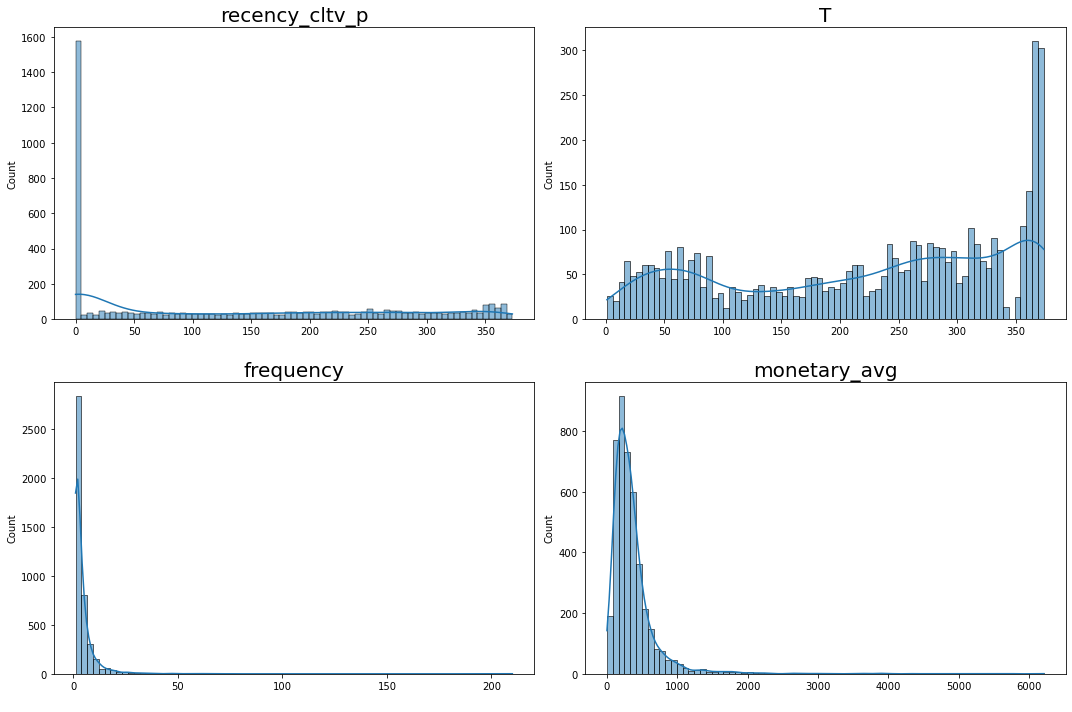

In [107]:
plt.figure(figsize=(15,10))
for col in range(0, len(rfm.columns)):
    plt.subplot(2,2,col+1)
    sns.histplot(x=rfm[rfm.columns[col]], bins=75, kde=True, palette='Blues_d')
    plt.xlabel(' ')
    plt.title(rfm.columns[col], fontsize=20)
    plt.tight_layout()

In [108]:
# CALCULATION OF WEEKLY RECENCY AND WEEKLY T for BGNBD
## recency_weekly_p
rfm["recency_weekly_p"] = rfm["recency_cltv_p"]/7
rfm["T_weekly"] =rfm["T"]/7

# CONTROLLING
rfm = rfm[(rfm["monetary_avg"]>0) ]

## freq > 1
rfm = rfm[(rfm['frequency']>1)]
rfm["frequency"] = rfm["frequency"].astype(int)
rfm.head()

,recency_cltv_p,T,frequency,monetary_avg,recency_weekly_p,T_weekly
Customer ID,,,,,,
12347.00000,365,368,7,615.71429,52.14286,52.57143
12348.00000,282,359,4,442.69500,40.28571,51.28571
12352.00000,260,297,8,219.54250,37.14286,42.42857
12356.00000,302,326,3,937.14333,43.14286,46.57143
12358.00000,149,151,2,575.21000,21.28571,21.57143


The BG/NBD (Beta Geometric/Negative Binomial Distribution) model is a method used to estimate the Customer Lifetime Value (CLTV) of your customers. Let's understand it with a real-life example.

Imagine you have an online store that sells clothing. You have a large customer base, and you want to predict how much value each customer will generate for your business over their lifetime.

The BG/NBD model considers two main aspects of customer behavior: the frequency of their purchases and the likelihood of them churning or stopping their purchases.

First, the model looks at the purchase frequency of each customer. It uses the Beta-Geometric distribution to estimate how likely a customer is to make repeat purchases over time. This distribution takes into account factors like the time between purchases and the overall purchasing patterns of the customer.

Next, the model considers the dropout or churn rate. It uses the Negative Binomial distribution to estimate the probability of a customer stopping their purchases and churning from your business.

By combining these two processes, the BG/NBD model provides insights into the future behavior of your customers. It calculates metrics such as the expected number of future purchases, the expected purchase value, the probability of a customer still being active, and the customer's expected lifetime.

Let's say you apply the BG/NBD model to your customer data and find that a particular customer is expected to make 5 more purchases on average, with an average purchase value of $50. The model also estimates a probability of 70% that the customer will still be active in the future and an expected lifetime of 2 years.

Using this information, you can calculate the CLTV for that customer by multiplying the expected number of purchases (5) by the average purchase value ($50) and the expected lifetime (2 years). In this case, the CLTV for that customer would be $500.

By applying the BG/NBD model to your entire customer base, you can estimate the CLTV for each customer, which helps you identify high-value customers, personalize marketing strategies, and make informed business decisions.

Remember, the BG/NBD model is just one approach to CLTV estimation, and its effectiveness may vary depending on your specific business context.

In [109]:
# 2. Establishing BG/NBD Model 

#First use BetaGeoFitter to fit the BG / NBD model to our data set.
#We will use the frequency, recency_weekly_p, and T_weekly columns we created in the previous step.

bgf = BetaGeoFitter(penalizer_coef=0.001)
bgf.fit(rfm['frequency'],
         rfm['recency_weekly_p'],
         rfm['T_weekly'])

#Our model is now fit and has found the distributions, so we can continue to perform the operations.
#2893 subject exists / containing distributions of transaction rates and drop rates
#distribution parameters: a: 0.12, alpha: 11.40, b: 2.49, r: 2.18>

<lifetimes.BetaGeoFitter: fitted with 2845 subjects, a: 0.12, alpha: 11.40, b: 2.49, r: 2.18>

In [110]:
print(bgf)
bgf.summary

<lifetimes.BetaGeoFitter: fitted with 2845 subjects, a: 0.12, alpha: 11.40, b: 2.49, r: 2.18>


,coef,se(coef),lower 95% bound,upper 95% bound
r,2.18176,0.07559,2.03360,2.32991
alpha,11.40298,0.46038,10.50063,12.30532
a,0.11859,0.01269,0.09373,0.14346
b,2.49099,0.22931,2.04154,2.94045


Who are the 10 customers we expected them to purchase the most, in 1 week?

In [113]:


bgf.conditional_expected_number_of_purchases_up_to_time(1,
                                                        rfm['frequency'],
                                                        rfm['recency_weekly_p'],
                                                        rfm['T_weekly']).head(10)




Customer ID
12347.00000   0.14128
12348.00000   0.09196
12352.00000   0.18240
12356.00000   0.08616
12358.00000   0.12226
12359.00000   0.09947
12360.00000   0.11962
12362.00000   0.22400
12363.00000   0.07559
12364.00000   0.21758
dtype: float64

In [118]:
rfm["expected_number_of_purchases"] =bgf.predict(1,
                                                  rfm['frequency'],
                                                  rfm['recency_weekly_p'],
                                                  rfm['T_weekly'])

rfm.sort_values("expected_number_of_purchases", ascending=False).head(10)

,recency_cltv_p,T,frequency,monetary_avg,recency_weekly_p,T_weekly,expected_number_of_purchases
Customer ID,,,,,,,
12748.00000,372,374,210,154.19243,53.14286,53.42857,3.26516
14911.00000,372,374,201,691.71010,53.14286,53.42857,3.12664
17841.00000,371,374,124,330.13435,53.00000,53.42857,1.94029
13089.00000,366,370,97,606.36247,52.28571,52.85714,1.53753
14606.00000,372,374,93,130.13903,53.14286,53.42857,1.46400
15311.00000,373,374,91,667.77912,53.28571,53.42857,1.43372
12971.00000,368,373,86,127.48587,52.57143,53.28571,1.35702
14646.00000,353,355,74,3596.80439,50.42857,50.71429,1.22252
13408.00000,371,374,62,453.50065,53.00000,53.42857,0.98625


In a Month

In [120]:
rfm["expected_number_of_purchases"] = bgf.predict(4,
                                                  rfm['frequency'],
                                                  rfm['recency_weekly_p'],
                                                  rfm['T_weekly'])

rfm.sort_values("expected_number_of_purchases", ascending=False).head(10)

,recency_cltv_p,T,frequency,monetary_avg,recency_weekly_p,T_weekly,expected_number_of_purchases
Customer ID,,,,,,,
12748.00000,372,374,210,154.19243,53.14286,53.42857,13.02567
14911.00000,372,374,201,691.71010,53.14286,53.42857,12.47310
17841.00000,371,374,124,330.13435,53.00000,53.42857,7.74034
13089.00000,366,370,97,606.36247,52.28571,52.85714,6.13346
14606.00000,372,374,93,130.13903,53.14286,53.42857,5.84027
15311.00000,373,374,91,667.77912,53.28571,53.42857,5.71947
12971.00000,368,373,86,127.48587,52.57143,53.28571,5.41348
14646.00000,353,355,74,3596.80439,50.42857,50.71429,4.87636
13408.00000,371,374,62,453.50065,53.00000,53.42857,3.93437


In [121]:
#Total number of purchases expected in 1 month
rfm.expected_number_of_purchases.sum()

1777.1450731636928

In [123]:
#Total number of purchases expected in 6 month
bgf.predict(4*6,
            rfm['frequency'],
            rfm['recency_weekly_p'],
            rfm['T_weekly']).sum()

10394.315175532347

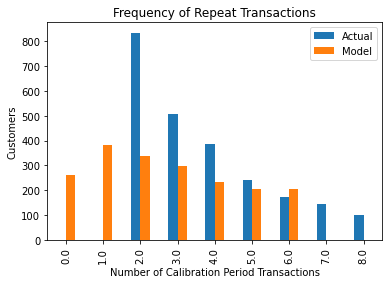

In [124]:
#  Evaluation of Forecast Results


plot_period_transactions(bgf)
plt.show()

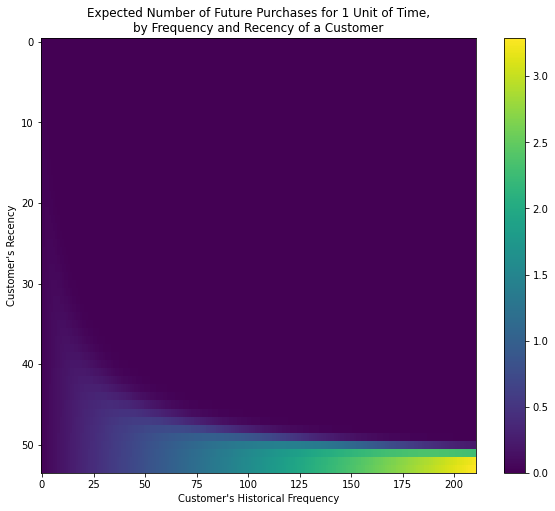

In [132]:
from lifetimes.plotting import plot_frequency_recency_matrix
plt.figure(figsize=(10,8))  
plot_frequency_recency_matrix(bgf)
plt.grid(False)

We can see that if a customer has bought 200 times from us, and their latest purchase was when they were 50Weeks days old (given the individual is 50 weeks old), then they are our best customer (bottom-right).

Our coldest customers are those that are in the top-right corner: they bought a lot quickly, and we haven’t seen them in months.

There’s also that beautiful 'tail' around (25,40). That represents the customer who buys infrequently, but we’ve seen them recently, so they might buy again - we’re not sure if they are dead or just between purchases.

Another interesting matrix to look at is the probability of still being alive:

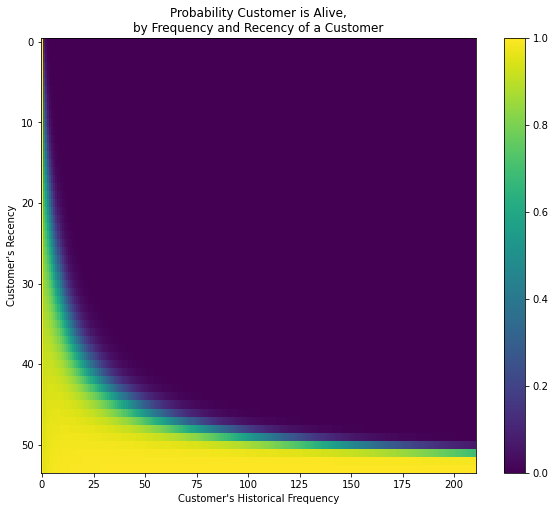

In [135]:
from lifetimes.plotting import plot_probability_alive_matrix
plt.figure(figsize=(10,8)) 
plot_probability_alive_matrix(bgf)
plt.grid(False)